INSTALLING DEPENDENCIES


In [31]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!pip install easyocr

Looking in indexes: https://download.pytorch.org/whl/cu117, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [32]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

SAMPLE TESTING

In [47]:
Image_path = "C:/Users/himan/Downloads/surf.jpeg"

In [48]:
Image_path = "C:/Users/himan/Downloads/out.png"

In [49]:
reader = easyocr.Reader(['en'],gpu=True)
result = reader.readtext(Image_path)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[56, 140], [172, 140], [172, 172], [56, 172]], 'OUT OF', 0.885434426214403),
 ([[45, 170], [182, 170], [182, 206], [45, 206]],
  'SERVICE',
  0.6164180093899556)]

DRAWING RESULTS


In [39]:
t_left = tuple(result[0][0][0])
b_right = tuple(result[0][0][2])
text=result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

<function matplotlib.pyplot.show(close=None, block=None)>

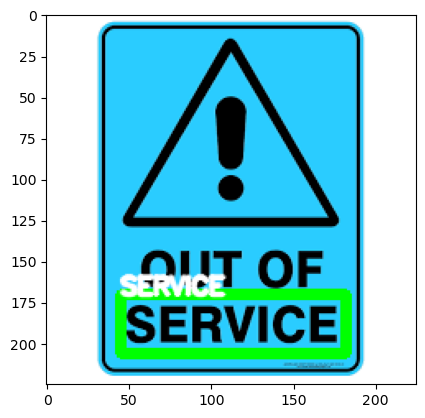

In [55]:
img = cv2.imread(Image_path)
img = cv2.rectangle(img,t_left,b_right,(0,255),5)
img = cv2.putText(img,text,t_left,font,0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show

MULTIPLE LINE SAMPLE

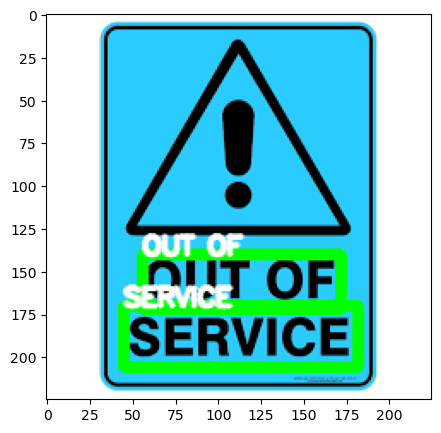

In [51]:
img = cv2.imread(Image_path)
for detect in result:
    t_left = tuple([int(val) for val in detect[0][0]])
    b_right = tuple([int(val)for val in detect[0][2]])
    text = detect[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,t_left,b_right,(0,255),5)
    img = cv2.putText(img,text,t_left,font,0.5,(255,255,255),2,cv2.LINE_AA) 
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()